In [1]:
cd ..

/Users/flamholz/Documents/workspace/ccm_evolution


In [2]:
mkdir -p figures/fig3

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [4]:
# Load data investigating effects of encapsulation
df_amb = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/090720_ED_OD600_ambientCO2.csv')
df_pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/072720_ED_OD600_0.5pctCO2.csv')
df_1pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/090720_ED_OD600_1.5pctCO2.csv')
df_5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/072720_ED_OD600_5pctCO2.csv')

co2_dfs_encap = [df_amb, df_pt5pct, df_1pt5pct, df_5pct]
co2_conds = 'amb,0.5%,1.5%,5%'.split(',')

In [5]:
# Load data investigating effects of a futile cycle
df_pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/011120_futile_cycle_0.5%.csv')
df_1pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/011120_futile_cycle_1.5%.csv')
df_5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/050321_futile_cycle_5%.csv')
df_amb = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/050321_futile_cycle_amb.csv')

co2_dfs_futcyc = [df_amb, df_pt5pct, df_1pt5pct, df_5pct]

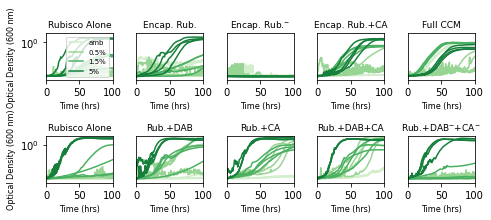

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(7,3))

xlim = (0, 100)
ylim = (0.03, 2.2)

# Plot the encapsulation data up top
inactive_rub = "CCMB1:pCB' K194M+pCCM'"
rub_alone = "CCMB1:p1A+pFA-sfGFP"
rub_encap = "CCMB1:pCB' C173S+pFA-sfGFP"
rub_ca_encap = "CCMB1:pCB'+pFA-sfGFP"
full_ccm = "CCMB1:pCB'+pCCM'"
strain_names_encap = [rub_alone, rub_encap, inactive_rub, rub_ca_encap, full_ccm]
titles_encap = 'Rubisco Alone,Encap. Rub.,Encap. Rub.$^{-}$,Encap. Rub.+CA,Full CCM'.split(',')

pal = sns.color_palette('Greens', n_colors=4)
for strain, ax in zip(strain_names_encap, axs[0,:].flatten()):
    plt.sca(ax)
    cols = [strain+'.{0}'.format(i) for i in range(1,5)]
    for j, my_df in enumerate(co2_dfs_encap):
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            plt.semilogy(time_h, my_df[col], color=pal[j], label=label)
            label = None
    
# Plot the futile cycle data below
rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names_futcyc = [rub_alone, plus_transport, plus_ca, futile_cycle, double_neg]
titles_futcyc = 'Rubisco Alone,Rub.+DAB,Rub.+CA,Rub.+DAB+CA,Rub.+DAB$^{-}$+CA$^{-}$'.split(',')
titles = titles_encap + titles_futcyc

for strain, ax in zip(strain_names_futcyc, axs[1,:].flatten()):
    plt.sca(ax)
    cols = [strain+' {0}'.format(i) for i in range(1,5)]
    for j, my_df in enumerate(co2_dfs_futcyc):
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            plt.semilogy(time_h, my_df[col], color=pal[j], label=label)
            label = None
    
for i, (title, ax) in enumerate(zip(titles, axs.flatten())):
    plt.sca(ax)
    plt.title(title, fontsize=9)
    plt.xlabel('Time (hrs)', fontsize=8)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if i == 0:
        plt.legend(fontsize=7)
    if i%5 == 0:
        plt.ylabel('Optical Density (600 nm)', fontsize=8)
    else:
        plt.yticks([])

plt.tight_layout()
plt.savefig('figures/fig3/fig3_S1.png', dpi=600, facecolor='w')
plt.show()

In [7]:
co2_dfs_futcyc[0].columns

Index(['cycle_n', 'time_s', 'Blank', 'Blank.1', 'Blank.2', 'Blank.3',
       'Blank.4', 'Blank.5', 'Blank.6', 'Blank.7', 'Blank.8', 'Blank.9',
       'Blank.10', 'Blank.11', 'cLS/AGFP 1', 'cLS/AGFP 2', 'cLS/AGFP 3',
       'cLS/AGFP 4', 'cLS/Dab2-Can 1', 'cLS/Dab2-Can 2', 'cLS/Dab2-Can 3',
       'cLS/Dab2-Can 4', 'cLS/dDab2-Can 1', 'cLS/dDab2-Can 2',
       'cLS/dDab2-Can 3', 'cLS/dDab2-Can 4', 'cLS/AGFP 1.1', 'cLS/AGFP 2.1',
       'cLS/AGFP 3.1', 'cLS/AGFP 4.1', 'cLS/Dab2-Can 1.1', 'cLS/Dab2-Can 2.1',
       'cLS/Dab2-Can 3.1', 'cLS/Dab2-Can 4.1', 'cLS/dDab2-Can 1.1',
       'cLS/dDab2-Can 2.1', 'cLS/dDab2-Can 3.1', 'cLS/dDab2-Can 4.1',
       'cLS/AGFP 1.2', 'cLS/AGFP 2.2', 'cLS/AGFP 3.2', 'cLS/AGFP 4.2',
       'cLS/Dab2-Can 1.2', 'cLS/Dab2-Can 2.2', 'cLS/Dab2-Can 3.2',
       'cLS/Dab2-Can 4.2', 'cLS/dDab2-Can 1.2', 'cLS/dDab2-Can 2.2',
       'cLS/dDab2-Can 3.2', 'cLS/dDab2-Can 4.2', 'cLS/Dab2-dCan 1',
       'cLS/Dab2-dCan 2', 'cLS/Dab2-dCan 3', 'cLS/Dab2-dCan 4',
       'cLS/d

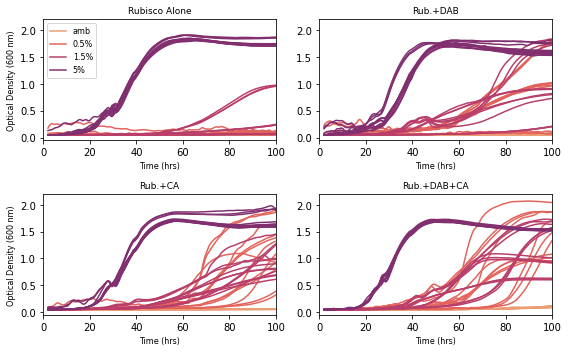

In [8]:
# Zoom in on cases that are interesting for our models.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,5))

xlim = (0, 100)
ylim = (-0.05, 2.2)

# Plot the futile cycle data below
rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names = [rub_alone, plus_transport, plus_ca, futile_cycle]
titles = 'Rubisco Alone,Rub.+DAB,Rub.+CA,Rub.+DAB+CA'.split(',')

pal = sns.color_palette('flare', n_colors=12)
for strain, ax in zip(strain_names, axs.flatten()):
    plt.sca(ax)
    for j, my_df in enumerate(co2_dfs_futcyc):
        cols = [c for c in my_df.columns if c.startswith(strain)]
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            ods = my_df[col].rolling(3).mean().rolling(3).mean()
            plt.plot(time_h, ods, color=pal[3*j], label=label)
            label = None
    
for i, (title, ax) in enumerate(zip(titles, axs.flatten())):
    plt.sca(ax)
    plt.title(title, fontsize=9)
    plt.xlabel('Time (hrs)', fontsize=8)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if i == 0:
        plt.legend(fontsize=8)
    if i % 2 == 0:
        plt.ylabel('Optical Density (600 nm)', fontsize=8)

plt.tight_layout()
plt.show()


In [9]:
# Make DataFrames with blanked endpoint data for encapsulation and futile cycle data.
data_dict = {}
for cond, df in zip(co2_conds, co2_dfs_encap):
    columns = df.columns
    blank_cols = [c for c in columns if c.startswith('BLANK')]
    blank_val = df[blank_cols].mean().mean()
    blanked_df = df.copy()
    blanked_df[blanked_df.columns[4:]] -= blank_val
    cols2drop = blank_cols + list(columns[:4])
    mean_df = blanked_df.drop(cols2drop, axis=1).rolling(5).mean()
    endpoint_series = mean_df.iloc[-1]
    data_dict[cond] = endpoint_series

encap_endpoint_df = pd.DataFrame(data_dict)
encap_endpoint_df['strain'] = [idx.split('.')[0] for idx in encap_endpoint_df.index]
encap_endpoint_df = encap_endpoint_df.melt(id_vars=['strain'], value_name='endpoint_OD', var_name='CO2')

data_dict = {}
for cond, df in zip(co2_conds, co2_dfs_futcyc):
    columns = df.columns
    blank_cols = [c for c in columns if c.startswith('Blank')]
    blank_val = df[blank_cols].mean().mean()
    blanked_df = df.copy()
    blanked_df[blanked_df.columns[4:]] -= blank_val
    cols2drop = blank_cols + list(columns[:4])
    mean_df = blanked_df.drop(cols2drop, axis=1).rolling(5).mean()
    endpoint_series = mean_df.iloc[-1]
    data_dict[cond] = endpoint_series
    
futcyc_endpoint_df = pd.DataFrame(data_dict)
futcyc_endpoint_df['strain'] = [idx.split(' ')[0] for idx in futcyc_endpoint_df.index]
futcyc_endpoint_df = futcyc_endpoint_df.melt(id_vars=['strain'], value_name='endpoint_OD', var_name='CO2')

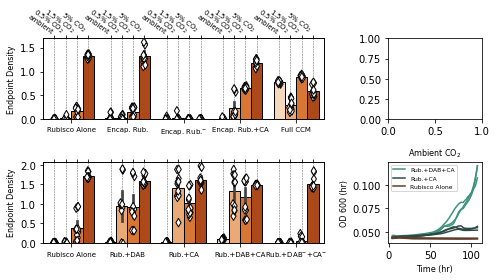

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,4),
                        gridspec_kw=dict(width_ratios=[3,1]))

strip_pal = ['w']*4
oranges = sns.color_palette('Oranges', n_colors=4)
greys = sns.color_palette('Greys')

plt.sca(axs[0,0])
sns.barplot(data=encap_endpoint_df,
            x='strain', y='endpoint_OD', hue='CO2',
            order=strain_names_encap, hue_order=co2_conds,
            dodge=0.25, edgecolor='k', palette=oranges)
sns.stripplot(data=encap_endpoint_df,
              x='strain', y='endpoint_OD', hue='CO2', 
              order=strain_names_encap, hue_order=co2_conds, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)
xlocs = np.arange(len(titles_encap))
plt.xticks(xlocs, titles_encap, fontsize=7)
plt.xlabel('')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.ylabel('Endpoint Density', fontsize=8)
plt.legend().set_visible(False)

plt.sca(axs[1, 0])
sns.barplot(data=futcyc_endpoint_df,
            x='strain', y='endpoint_OD', hue='CO2',
            order=strain_names_futcyc, hue_order=co2_conds,
            dodge=0.25, edgecolor='k', palette=oranges)
sns.stripplot(data=futcyc_endpoint_df,
              x='strain', y='endpoint_OD', hue='CO2',
              order=strain_names_futcyc, hue_order=co2_conds, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)
xlocs = np.arange(len(titles_futcyc))
plt.xticks(xlocs, titles_futcyc, fontsize=7, va='baseline')
plt.gca().xaxis.set_tick_params(pad=10)
plt.xlabel('')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.ylabel('Endpoint Density', fontsize=8)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.legend().set_visible(False)

xticks = np.arange(0, 0.8, 0.2) - 0.3
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = 'ambient,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$'.split(',')*5

for i, ax in enumerate(axs[:,0].flatten()):
    plt.sca(ax)    
    for xpos in xticks:
        plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])

    axT = ax.twiny()
    plt.sca(axT)
    plt.xlim(ax.get_xlim())
    
    if i == 0:
        plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
    else:
        plt.xticks(xticks, ['']*5*4, ha='right', rotation=-35, fontsize=7)
    plt.tick_params(pad=0)
    
# Plot futile cycle dynamics.
plt.sca(axs[1,1])

strains2plot = [futile_cycle, plus_ca, rub_alone]
strain_titles = 'Rub.+DAB+CA,Rub.+CA,Rubisco Alone'.split(',')
amb_df = co2_dfs_futcyc[0]

pal = sns.diverging_palette(165, 30, s=80, l=55, n=7, center='dark')
for i, strain in enumerate(strains2plot):
    cols = ['{0} {1}.2'.format(strain, i) for i in range(1,4)]
    time_h = amb_df.time_s / 60 / 60
    label = strain_titles[i]
    for col in cols:
        ods = amb_df[col].rolling(5).mean().rolling(5).mean()
        plt.plot(time_h, ods, color=pal[2*i], label=label)
        label = None

plt.title('Ambient CO$_2$', fontsize=8)
plt.legend(fontsize=6)
plt.xlabel('Time (hr)', fontsize=8)
plt.ylabel('OD 600 (hr)', fontsize=8)
    
plt.tight_layout()
    
#plt.savefig('figures/fig3/fig3_full.png', dpi=600, facecolor='w')
plt.show()

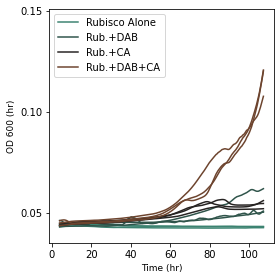

In [24]:
# Futile cycle ambient zoom in.
# Need to figure out colors & placement for main text.
fig, axs = plt.subplots(figsize=(4,4))

rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names = [rub_alone, plus_transport, plus_ca, futile_cycle]
titles = 'Rubisco Alone,Rub.+DAB,Rub.+CA,Rub.+DAB+CA'.split(',')
amb_df = co2_dfs_futcyc[0]


pal = sns.diverging_palette(165, 30, n=5, center='dark')
for i, strain in enumerate(strain_names):
    cols = ['{0} {1}.2'.format(strain, i) for i in range(1,4)]
    time_h = amb_df.time_s / 60 / 60
    label = titles[i]
    for col in cols:
        ods = amb_df[col].rolling(5).mean().rolling(5).mean()
        plt.plot(time_h, ods, color=pal[i], label=label)
        label = None

plt.legend()
plt.xlabel('Time (hr)', fontsize=9)
plt.ylabel('OD 600 (hr)', fontsize=9)
plt.ylim(0.035, 0.151)
plt.yticks(np.arange(0.05, 0.151, 0.05))

plt.tight_layout()
plt.savefig('figures/fig3/futile_cycle_amb.png', dpi=600, facecolor='w')
plt.show()


In [12]:
amb_df.columns

Index(['cycle_n', 'time_s', 'Blank', 'Blank.1', 'Blank.2', 'Blank.3',
       'Blank.4', 'Blank.5', 'Blank.6', 'Blank.7', 'Blank.8', 'Blank.9',
       'Blank.10', 'Blank.11', 'cLS/AGFP 1', 'cLS/AGFP 2', 'cLS/AGFP 3',
       'cLS/AGFP 4', 'cLS/Dab2-Can 1', 'cLS/Dab2-Can 2', 'cLS/Dab2-Can 3',
       'cLS/Dab2-Can 4', 'cLS/dDab2-Can 1', 'cLS/dDab2-Can 2',
       'cLS/dDab2-Can 3', 'cLS/dDab2-Can 4', 'cLS/AGFP 1.1', 'cLS/AGFP 2.1',
       'cLS/AGFP 3.1', 'cLS/AGFP 4.1', 'cLS/Dab2-Can 1.1', 'cLS/Dab2-Can 2.1',
       'cLS/Dab2-Can 3.1', 'cLS/Dab2-Can 4.1', 'cLS/dDab2-Can 1.1',
       'cLS/dDab2-Can 2.1', 'cLS/dDab2-Can 3.1', 'cLS/dDab2-Can 4.1',
       'cLS/AGFP 1.2', 'cLS/AGFP 2.2', 'cLS/AGFP 3.2', 'cLS/AGFP 4.2',
       'cLS/Dab2-Can 1.2', 'cLS/Dab2-Can 2.2', 'cLS/Dab2-Can 3.2',
       'cLS/Dab2-Can 4.2', 'cLS/dDab2-Can 1.2', 'cLS/dDab2-Can 2.2',
       'cLS/dDab2-Can 3.2', 'cLS/dDab2-Can 4.2', 'cLS/Dab2-dCan 1',
       'cLS/Dab2-dCan 2', 'cLS/Dab2-dCan 3', 'cLS/Dab2-dCan 4',
       'cLS/d